# WIND ROSE DIAGRAM

In [1]:
#import library
from windrose import WindroseAxes
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

# Input data Angin

In [2]:
#salin path tempat penyimpanan data 
fn='E:/01 KULIAH/05 SEMESTER 7/asprak/ANDAT/data/dataangin.nc' #misal 
#melihat informasi dari dataset yang didonwload
ds=nc.Dataset(fn)
ds


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-10-21 18:37:54 GMT by grib_to_netcdf-2.23.0: grib_to_netcdf /data/scratch/20211021-1830/06/_mars-webmars-public-svc-green-007-6fe5cac1a363ec1525f54343b6cc9fd8-jJrCX_.grib -o /data/scratch/20211021-1830/45/_grib2netcdf-webmars-public-svc-green-002-6fe5cac1a363ec1525f54343b6cc9fd8-SiX3p2.nc -utime
    dimensions(sizes): longitude(57), latitude(41), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time,latitude,longitude), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

## Deklarasi Variabel Data Angin
masukin variabel dalam nc ke variabel buatan kita sendiri

rose diagram itu, inputnya harus time series sedangkan pada input data kita tau kalo data yg di download merupakan data spasial makanya diambil deh satu kolom latitude dan longitudenya itu maksudnya ngambil 1 grid.

setiap orang dalam setiap kelompok diusahakan mengambil dari grid yang berbeda supaya dapat dilihat ketersesuaian data dalam satu daerah tersebut


In [3]:
u=ds.variables['u10'][:,20,20] ## ini contoh grid yang diambil ada (20,20)
v=ds.variables['v10'][:,20,20] ## ini contoh grid yang diambil ada (20,20)
lon=ds.variables['longitude'][:]
lat=ds.variables['latitude'][:]
time=ds.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u))
print('dimensi v',np.shape(v))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (124,)
dimensi v (124,)
dimensi lon (57,)
dimensi lat (41,)
dimensi time (124,)


In [4]:
#untuk melihat data
data_angin=pd.DataFrame(u,columns=['u'])
data_angin['v']=v
display(data_angin)

,u,v
0,-6.837237,3.266419
1,-6.255401,1.156520
2,-4.372923,0.553432
3,-2.958327,2.181543
4,-3.194056,2.323098
...,...,...
119,-3.672216,3.409794
120,-3.462183,2.685406
121,-1.932963,0.661078
122,-3.566753,3.360637


## Besaran dan Arah Angin
untuk membuat rose diagram, data input nya harus berupa magnitudo dan arah

In [5]:
mag=[]
for i in range(len(data_angin)):
    rumuz=math.hypot(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    mag.append(rumuz)
data_angin['magnitude']=mag[:]

dir=[]
for i in range(len(data_angin)):
    rumus=180+(180/math.pi)*math.atan2(data_angin['u'].iloc[i],data_angin['v'].iloc[i])
    rumus=rumus%360
    dir.append(rumus)

data_angin['direction']=dir[:]

display(data_angin)

,u,v,magnitude,direction
0,-6.837237,3.266419,7.577421,115.535652
1,-6.255401,1.156520,6.361413,100.474763
2,-4.372923,0.553432,4.407804,97.212940
3,-2.958327,2.181543,3.675708,126.405971
4,-3.194056,2.323098,3.949528,126.029111
...,...,...,...,...
119,-3.672216,3.409794,5.011175,132.877893
120,-3.462183,2.685406,4.381566,127.798567
121,-1.932963,0.661078,2.042883,108.880800
122,-3.566753,3.360637,4.900572,133.295739


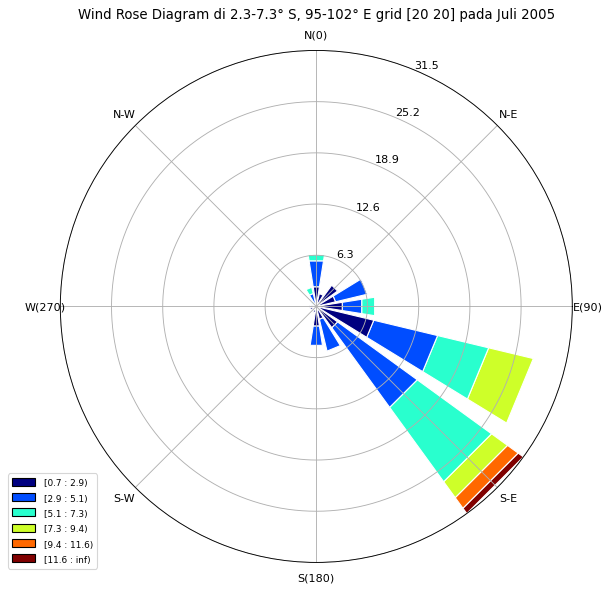

In [6]:
ax = WindroseAxes.from_ax(theta_labels=["E(90)","N-E","N(0)","N-W","W(270)","S-W","S(180)","S-E"])
ax.bar(data_angin['direction'], data_angin['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=False)
ax.set_title('Wind Rose Diagram di 2.3-7.3° S, 95-102° E grid [20 20] pada Juli 2005')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))
plt.show()
#plt.savefig('E:/01 KULIAH/03 SEMESTER 5/ANDAT/PRAKTIKUM/modul4/MODUL 4 ANALISIS DATA 2020/MODUL 4 ANALISIS DATA/windrose.png',dpi=300) #buat nyimpen langsung ke pc

# CURRENT ROSE DIAGRAM
## Input Data Arus

In [7]:
#salin path tempat penyimpanan data 
fn2='E:/01 KULIAH/05 SEMESTER 7/asprak/ANDAT/data/1expt_19_2005.nc4' #misal
#melihat informasi dari dataset yang didonwload
ds2=nc.Dataset(fn2)
ds2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2005; Translation Date = 2021-10-21T16:10:41.542Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(31), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v(time,d

# Deklarasi Variabel Arus
grid yang dipilih pada arus u dan v sama kaya grid angin aja supaya diasumsikan tempatnya deketan

In [8]:
u2=ds2.variables['water_u'][:,:,20,20] #[:,1,1]
v2=ds2.variables['water_v'][:,:,20,20] #[:,1,1]
lon2=ds2.variables['lon'][:]
lat2=ds2.variables['lat'][:]
time2=ds2.variables['time'][:]

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time2))

dimensi u (31, 1)
dimensi v (31, 1)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (31,)


In [9]:
#untuk melihat data
data_arus=pd.DataFrame(u2,columns=['u'])
data_arus['v']=v2
display(data_arus)

,u,v
0,0.032,-0.168
1,-0.029,-0.107
2,-0.137,-0.050
3,0.083,-0.129
4,0.132,0.037
5,0.017,0.149
6,0.019,0.156
7,0.044,0.149
8,0.092,0.300
9,0.071,0.378


# Besaran dan Arah Arus

In [10]:
mag2=[]
for i in range(len(data_arus)):
    rumuz2=math.hypot(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    mag2.append(rumuz2)
data_arus['magnitude']=mag2[:]

dir2=[]
for i in range(len(data_arus)):
    rumus2=180+(180/math.pi)*math.atan2(data_arus['u'].iloc[i],data_arus['v'].iloc[i])
    rumus2=rumus2%360
    dir2.append(rumus2)
data_arus['direction']=dir2[:]

display(data_arus)

,u,v,magnitude,direction
0,0.032,-0.168,0.171020,349.215702
1,-0.029,-0.107,0.110860,15.164460
2,-0.137,-0.050,0.145839,69.949764
3,0.083,-0.129,0.153395,327.242331
4,0.132,0.037,0.137088,254.341654
5,0.017,0.149,0.149967,186.508957
6,0.019,0.156,0.157153,186.944131
7,0.044,0.149,0.155361,196.451978
8,0.092,0.300,0.313790,197.049032
9,0.071,0.378,0.384610,190.637957


# Membuat Current Rose

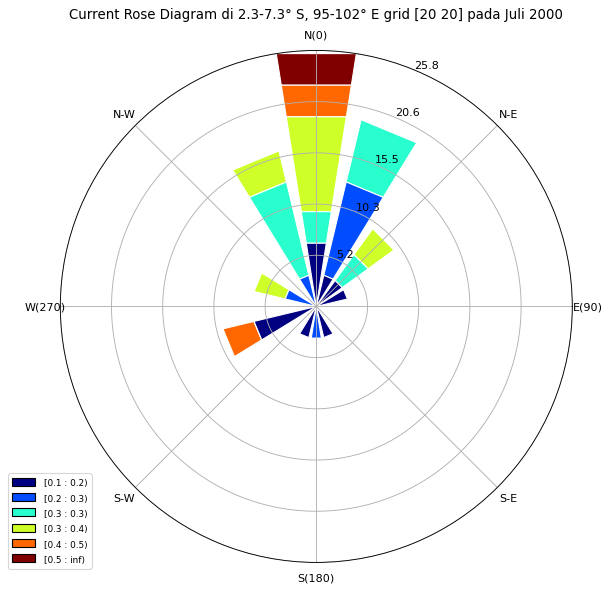

In [14]:
ax = WindroseAxes.from_ax(theta_labels=["E(90)","N-E","N(0)","N-W","W(270)","S-W","S(180)","S-E"])
ax.bar(data_arus['direction'], data_arus['magnitude'], normed=True, opening=0.8, edgecolor='white', blowto=True)
ax.set_title('Current Rose Diagram di 2.3-7.3° S, 95-102° E grid [20 20] pada Juli 2005')
ax.set_legend(bbox_to_anchor=(-0.1, -0.01))
plt.show()
#plt.savefig('E:/01 KULIAH/03 SEMESTER 5/ANDAT/PRAKTIKUM/modul4/MODUL 4 ANALISIS DATA 2020/MODUL 4 ANALISIS DATA/current rose.png',dpi=300) ##buat nyimpen langsung ke pc